In [558]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)


Num GPUs Available:  1
2.10.0


## Creating data to view and fit

array([ True,  True,  True,  True,  True,  True,  True,  True])

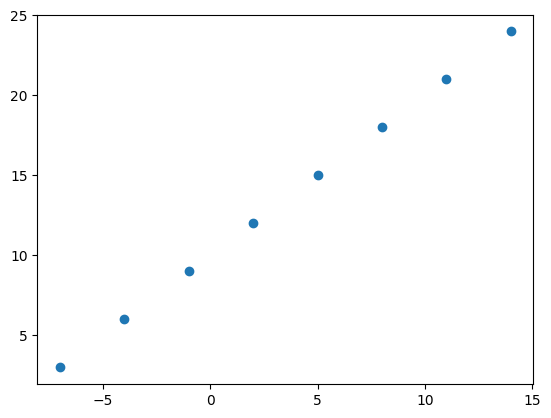

In [559]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
y == X + 10

## Input and output shapes

In [560]:
X.shape, y.shape

((8,), (8,))

In [561]:

# Turn our NumPy arrays into tensors with dtype float32
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

**Note:** shape of inputs should not be 1

In [562]:
X = tf.expand_dims(X, axis=-1)

X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [563]:
X.dtype, y.dtype

(tf.float64, dtype('float64'))

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers pf a machine(deep) learning model.
2. **Compiling a model** - define the loss function, the optimizer and evaluation metrics. 
3. **Fitting a model** - letting the model try to find patterns between inputs and outputs

### Sequential way to build a model

In [564]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics='mae')  # mae : mean absolute error
# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 241ms/step - loss: 13.0704 - mae: 13.0704
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 13.0329 - mae: 13.0329
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 12.9954 - mae: 12.9954
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.9579 - mae: 12.9579
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.9204 - mae: 12.9204


**MAE function :**


In [565]:
y_true = np.array([[1, 2, 3], [4, 5, 6]])
y_pred = np.array([[2, 3, 2], [7, 1, 4]])
loss = np.mean(abs(y_true - y_pred), axis=-1)
loss
#axis=-1: Indicates that the mean should be calculated along the last axis of the input array.

array([1., 3.])

### Functional API way to build a model

In [566]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               metrics=['mae'])

model2.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 184ms/step - loss: 9.9261 - mae: 9.9261
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 8.6011 - mae: 8.6011
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 7.3500 - mae: 7.3500
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 7.2938 - mae: 7.2938
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.2375 - mae: 7.2375


In [567]:
class personalized_Callback(tf.keras.callbacks.Callback):
    def __init__(self, SHOW_NUMBER=10):
        super().__init__()
        self.SHOW_NUMBER = SHOW_NUMBER
        self.counter = 1

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch + 1  # Increment epoch at the beginning

    def on_train_batch_end(self, batch, logs=None):
        if (self.epoch % self.SHOW_NUMBER == 0) or self.epoch == 1:  # Print only on last batch of a multiple epoch
            print(f'batch : {batch + 1} | epoch : {self.epoch} | loss: {logs["loss"]}')
        self.counter += 1


model2.fit(X, y, epochs=50, callbacks=[personalized_Callback(10)], verbose=0)


batch : 1 | epoch : 1 | loss: 7.181250095367432
batch : 1 | epoch : 10 | loss: 6.674999713897705
batch : 1 | epoch : 20 | loss: 6.112499713897705
batch : 1 | epoch : 30 | loss: 5.56874942779541
batch : 1 | epoch : 40 | loss: 5.00624942779541
batch : 1 | epoch : 50 | loss: 4.462499618530273


### Make a prediction with our model

In [568]:
model2.predict([15, 20, 23]), model.predict([17, 20, 23])

1/1 [==============================] - 0s 56ms/step


(array([[26.191586],
        [33.547115],
        [37.96043 ]], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32))

 ### Improving our model
 
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the nb of hidden layer units within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

### <i>More epochs!</i>

In [569]:

# Let's rebuild our model

# 1. Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model3.fit(X, y, epochs=100, verbose=0, )  # verbose=0 to skip printing details about training


In [570]:
model3.predict([17])


1/1 [==============================] - 0s 49ms/step


array([[30.132486]], dtype=float32)

**Big improvment error of 2.xxx on this prediction and LOSS +=- 6**

### <i>More layers!</i>

In [571]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Dense(units=1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics='mae')

model3.fit(X, y, epochs=10, verbose=0, callbacks=[personalized_Callback()])


batch : 1 | epoch : 1 | loss: 11.76866340637207
batch : 1 | epoch : 10 | loss: 7.4345245361328125


**Tiny improvement LOSS +=- 13.xx**

### <i>More neurons!</i>

In [572]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1),

])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics='mae')

model4.fit(X, y, epochs=100, verbose=0, callbacks=[personalized_Callback()])


batch : 1 | epoch : 1 | loss: 13.39912223815918
batch : 1 | epoch : 10 | loss: 8.04546070098877
batch : 1 | epoch : 20 | loss: 3.909205198287964
batch : 1 | epoch : 30 | loss: 3.9196617603302
batch : 1 | epoch : 40 | loss: 3.86142635345459
batch : 1 | epoch : 50 | loss: 3.8569893836975098
batch : 1 | epoch : 60 | loss: 3.8168764114379883
batch : 1 | epoch : 70 | loss: 3.7812118530273438
batch : 1 | epoch : 80 | loss: 3.7747702598571777
batch : 1 | epoch : 90 | loss: 3.6993260383605957
batch : 1 | epoch : 100 | loss: 3.7449991703033447


In [573]:
model4.predict([17])

1/1 [==============================] - 0s 52ms/step


array([[32.129818]], dtype=float32)

**Good improvement LOSS +=- 3.xx but overfitting here**


### <i>Tuning hyperparameters!</i>
optimizer, learning rate,activation function, loss function... 


In [574]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='relu'),

])

model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
               metrics='mae')

model5.fit(X, y, epochs=100, verbose=0, callbacks=[personalized_Callback()])


batch : 1 | epoch : 1 | loss: 12.981094360351562
batch : 1 | epoch : 10 | loss: 12.7777099609375
batch : 1 | epoch : 20 | loss: 12.19124984741211
batch : 1 | epoch : 30 | loss: 7.1949286460876465
batch : 1 | epoch : 40 | loss: 4.188557147979736
batch : 1 | epoch : 50 | loss: 3.48956298828125
batch : 1 | epoch : 60 | loss: 3.111490488052368
batch : 1 | epoch : 70 | loss: 2.8792693614959717
batch : 1 | epoch : 80 | loss: 2.41906476020813
batch : 1 | epoch : 90 | loss: 1.8873696327209473
batch : 1 | epoch : 100 | loss: 1.3732913732528687


In [575]:
model5.predict([17])  # BEST RESULT

1/1 [==============================] - 0s 48ms/step


array([[28.603378]], dtype=float32)

**HUGE improvement LOSS +=- 1,xx**


## Summary : 
  * Tuning our **hyperparamaters** and **NN architecture** is maybe the most important part in the training section. 
  * We did not need to resort to **cleaning** our data or getting **more samples** and despite this we improved the performance of our model.
  * More computations doesn't mean better results, and we encountered that in adding **more units** to our first hidden layer in 'model4', that led to overfitting '
  * **Combining** multiple changes and hyperparameters that **works together** gave us the best model 'model5'  

## Evaluating a model
<p>The typical workflow you'll go through when building a neural network is :
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> ....</p>

<p>The keywords in evaluation is <b>VISUALIZE, VISUALIZE, VISUALIZE</b></p> 

It's a good idea to visualize:

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [576]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [577]:
# Make labels for our dataset\
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

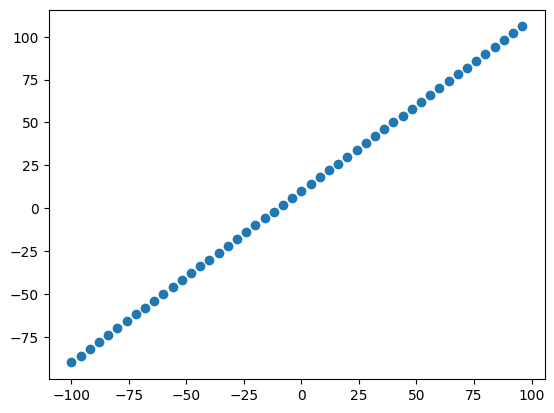

In [578]:
# Visualise the data 

plt.scatter(X, y)

## The 3 sets : 
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [579]:
dataset = tf.stack((X, y), axis=1)

shuffled_dataset = tf.random.shuffle(dataset)

X_shuffled, y_shuffled = tf.split(shuffled_dataset, num_or_size_splits=2, axis=1)


In [580]:
X_train = y_shuffled[:tf.cast(tf.math.floor(80 * len(X) / 100), tf.int32)]  # 80% of the data
X_test = y_shuffled[tf.cast(tf.math.floor(80 * len(X) / 100), tf.int32):]  # 20% of the data

y_train = y_shuffled[:tf.cast(tf.math.floor(80 * len(y) / 100), tf.int32)]  # 80% of the data
y_test = y_shuffled[tf.cast(tf.math.floor(80 * len(y) / 100), tf.int32):]  # 20% of the data

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(TensorShape([40, 1]),
 TensorShape([10, 1]),
 TensorShape([40, 1]),
 TensorShape([10, 1]))

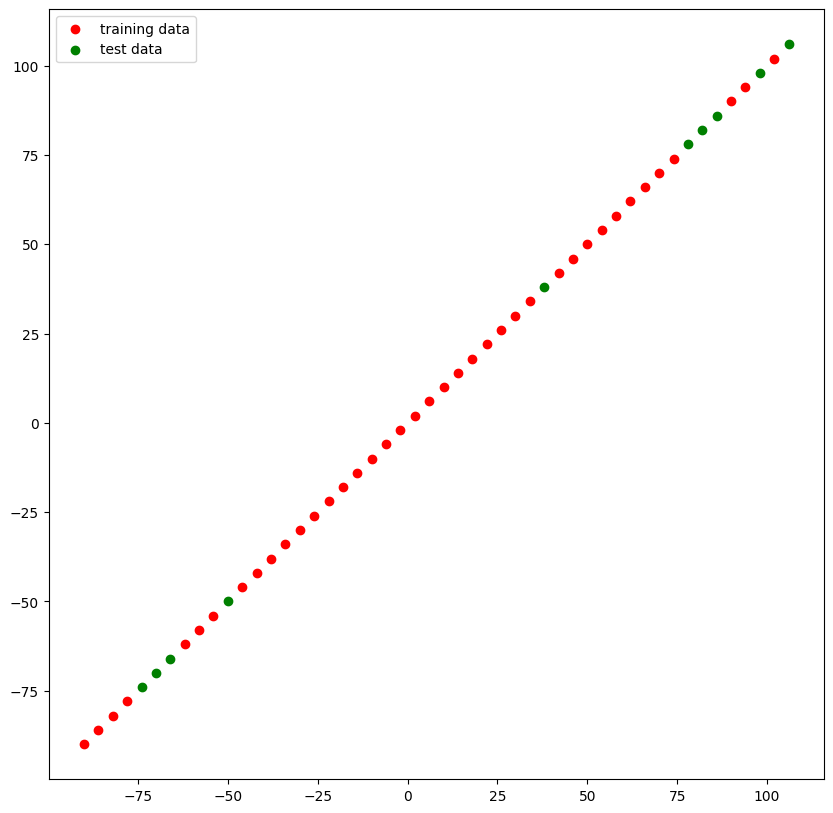

In [581]:
plt.figure(figsize=(10, 10))

plt.scatter(X_train, y_train, c='r', label='training data')
plt.scatter(X_test, y_test, c='g', label='test data')

plt.legend();  # ; is used to not get this matplotlib output '<matplotlib.legend.Legend at 0x169aa1aebe0>'

In [582]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=12, input_shape=[1, ], name='1stHiddenLayer'),
    tf.keras.layers.Dense(units=1, name='outputLayer')
], name='Model_x')
model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mse'])



In [583]:
model.build()  # The input shape should be specified in the creation of the model to build it
# We need to build the model first or fit it to use summary 
model.summary()

Model: "Model_x"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1stHiddenLayer (Dense)      (None, 12)                24        
                                                                 
 outputLayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters (it doesn't include the biases ).

* **Total params** - total number of parameters in the model. = `shape(x)*nb_units + nb_biases(nb_units)`
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during <b>transfer learning</b>).

In [584]:
model.fit((X_train), tf.squeeze(y_train),
          epochs=10,
          verbose=0,
          callbacks=personalized_Callback(10),
          batch_size=int(len(X_train) / 4))  # batch size is how the size of the samples passed in one forward prop

batch : 1 | epoch : 1 | loss: 19.75710105895996
batch : 2 | epoch : 1 | loss: 37.09745407104492
batch : 3 | epoch : 1 | loss: 41.711021423339844
batch : 4 | epoch : 1 | loss: 43.833621978759766
batch : 1 | epoch : 10 | loss: 0.7842347621917725
batch : 2 | epoch : 10 | loss: 0.8289704322814941
batch : 3 | epoch : 10 | loss: 0.9839340448379517
batch : 4 | epoch : 10 | loss: 0.9202572703361511


In [585]:
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 35ms/step


(array([[ 79.298096],
        [ 87.42859 ],
        [ 83.36334 ],
        [-50.78988 ],
        [-75.18137 ],
        [107.75484 ],
        [-67.05087 ],
        [ 38.645603],
        [ 99.624344],
        [-71.11612 ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 78],
        [ 86],
        [ 82],
        [-50],
        [-74],
        [106],
        [-66],
        [ 38],
        [ 98],
        [-70]])>)

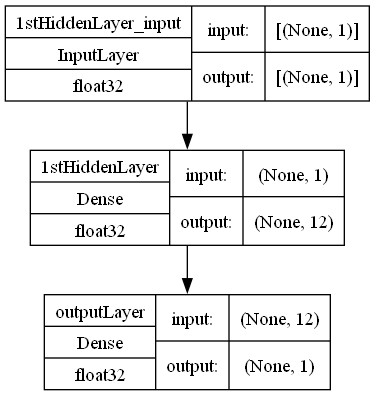

In [586]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True)

# Other methods to inspect the model or save it
# model.get_config()
# model.to_json()
# model.save_weights('weights.hdf5')

## Visualizin our model's predictions
It's a good idea to plot them against the grounded truth labels

In [587]:
def plot_predictions(train_data=X_train, y_train=y_train, test_data=X_test, y_true=y_test, predictions=y_pred):
    plt.figure(figsize=(6, 6))
    plt.scatter(train_data, y_train, c='b', label='Train data')
    plt.scatter(test_data, y_true, c='g', label='Test data')
    plt.scatter(test_data, predictions, c='r', label='Predicitons')
    plt.legend();  # this line is necessary to plot labels



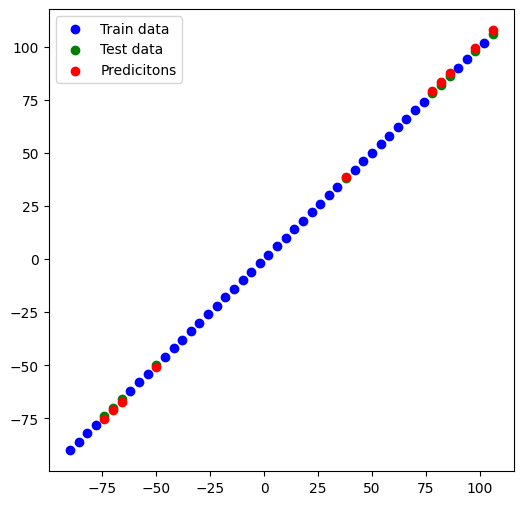

In [588]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)


## Evaluating our model's predictions with regression evaluation metrics 

Alongside visualizations, evaluation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [589]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 23ms/step - loss: 1.6089 - mse: 1.6089


([0.7365521788597107, 0.7365521788597107],
 [1.6088979244232178, 1.6088979244232178])

Tensorflow has also a built-in function for MSE and MAE

In [590]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([68.29619 , 70.1639  , 68.83657 , 86.02531 , 97.43393 , 83.15331 ,
       92.267334, 68.42531 , 77.078186, 94.45715 ], dtype=float32)>


Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [591]:
y_test.shape, y_pred.shape

(TensorShape([10, 1]), (10, 1))

In [592]:
y_pred = y_pred.squeeze()
y_test = tf.squeeze(y_test)
y_test.shape, y_pred.shape


(TensorShape([10]), (10,))

In [593]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2253056>

In [594]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.6088979>

In [595]:
def mae_function(y_test, y_pred):
    """
    Calculuates mean absolute error between y_test and y_preds.
    """
    return tf.metrics.mean_absolute_error(y_test,
                                          y_pred.squeeze())


def mse_function(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_preds.
    """
    return tf.metrics.mean_squared_error(y_test,
                                         y_pred.squeeze())

## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.


Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

`model_1` - same as original model, 1 layer, trained for 100 epochs.
`model_2` - 2 layers, trained for 100 epochs.
`model_3` - 2 layers, trained for 500 epochs.

#### Build `model_1`

In [596]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1, ])
])

model_1.compile(loss='mae',

                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae', 'mse'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train,
            epochs=100,
            verbose=0,
            callbacks=[personalized_Callback(25)])

batch : 1 | epoch : 1 | loss: 89.59715270996094
batch : 2 | epoch : 1 | loss: 89.83839416503906
batch : 1 | epoch : 25 | loss: 15.109701156616211
batch : 2 | epoch : 25 | loss: 12.668478965759277
batch : 1 | epoch : 50 | loss: 14.774407386779785
batch : 2 | epoch : 50 | loss: 12.810503005981445
batch : 1 | epoch : 75 | loss: 3.6642513275146484
batch : 2 | epoch : 75 | loss: 5.87716817855835
batch : 1 | epoch : 100 | loss: 12.285272598266602
batch : 2 | epoch : 100 | loss: 11.281506538391113


**Note** :  <p> if we don't specify input shape in the first layer the predict function will return 3D array of (x,1,1) </p>

1/1 [==============================] - 0s 32ms/step


((10, 1), TensorShape([10, 1]))

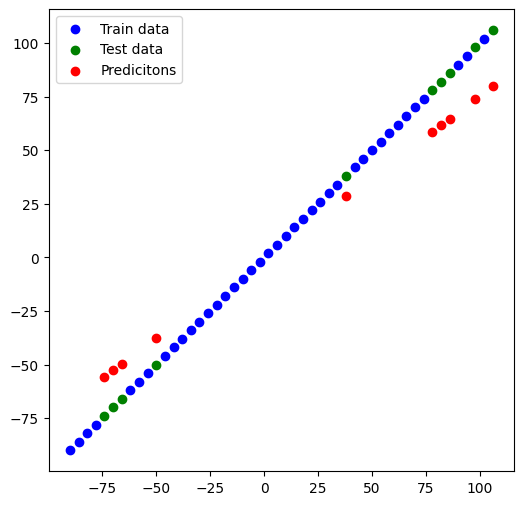

In [597]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)
y_preds_1.shape, X_test.shape

In [598]:
mae_1 = mae_function(y_test, y_preds_1).numpy()
mse_1 = mse_function(y_test, y_preds_1).numpy()
mae_1, mse_1


(18.477139, 364.41275)

#### Build `model_2` 
This time we will add an ectra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [599]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1, ]),
    tf.keras.layers.Dense(1)  # add a second layer
])

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae', 'mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train,
            epochs=100,
            verbose=0,
            callbacks=[personalized_Callback(25)])

batch : 1 | epoch : 1 | loss: 100.79060363769531
batch : 2 | epoch : 1 | loss: 96.13356018066406
batch : 1 | epoch : 25 | loss: 10.606832504272461
batch : 2 | epoch : 25 | loss: 13.875871658325195
batch : 1 | epoch : 50 | loss: 9.52968978881836
batch : 2 | epoch : 50 | loss: 13.047358512878418
batch : 1 | epoch : 75 | loss: 20.249242782592773
batch : 2 | epoch : 75 | loss: 17.542844772338867
batch : 1 | epoch : 100 | loss: 6.5469560623168945
batch : 2 | epoch : 100 | loss: 11.863718032836914


1/1 [==============================] - 0s 36ms/step


(10, 1)

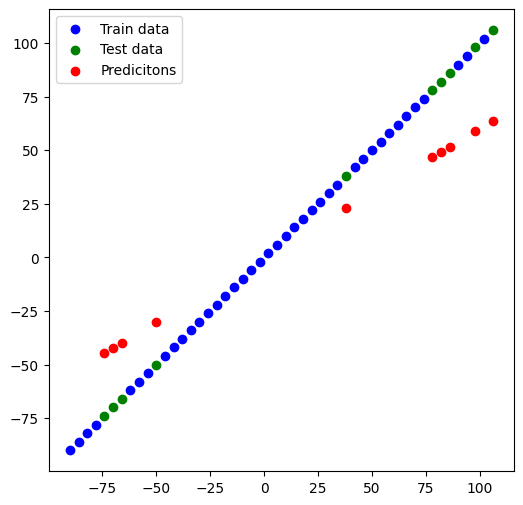

In [600]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)
y_preds_2.shape

In [601]:
# Calculate model_2 metrics
mae_2 = mae_function(y_test, y_preds_2).numpy()
mse_2 = mse_function(y_test, y_preds_2).numpy()
mae_2, mse_2

(29.793121, 947.42737)

#### Build `model_3`
For the 3rd model, same as model_2 except this time we'll train for longer (500 epochs instead of 100)

In [602]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1, ]),
    tf.keras.layers.Dense(1)  # add a second layer
])

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae', 'mse'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train,
            epochs=500,  # increase nb of epochs
            verbose=0,
            callbacks=[personalized_Callback(25)])

batch : 1 | epoch : 1 | loss: 35.33476257324219
batch : 2 | epoch : 1 | loss: 34.06615447998047
batch : 1 | epoch : 25 | loss: 14.26275634765625
batch : 2 | epoch : 25 | loss: 17.3218994140625
batch : 1 | epoch : 50 | loss: 1.44380521774292
batch : 2 | epoch : 50 | loss: 6.851935386657715
batch : 1 | epoch : 75 | loss: 17.99524688720703
batch : 2 | epoch : 75 | loss: 16.56402015686035
batch : 1 | epoch : 100 | loss: 2.275801658630371
batch : 2 | epoch : 100 | loss: 7.524026393890381
batch : 1 | epoch : 125 | loss: 26.380338668823242
batch : 2 | epoch : 125 | loss: 22.820934295654297
batch : 1 | epoch : 150 | loss: 20.15481185913086
batch : 2 | epoch : 150 | loss: 17.175559997558594
batch : 1 | epoch : 175 | loss: 5.958010673522949
batch : 2 | epoch : 175 | loss: 12.253447532653809
batch : 1 | epoch : 200 | loss: 27.425071716308594
batch : 2 | epoch : 200 | loss: 24.12841796875
batch : 1 | epoch : 225 | loss: 19.655120849609375
batch : 2 | epoch : 225 | loss: 17.386898040771484
batch : 

1/1 [==============================] - 0s 36ms/step


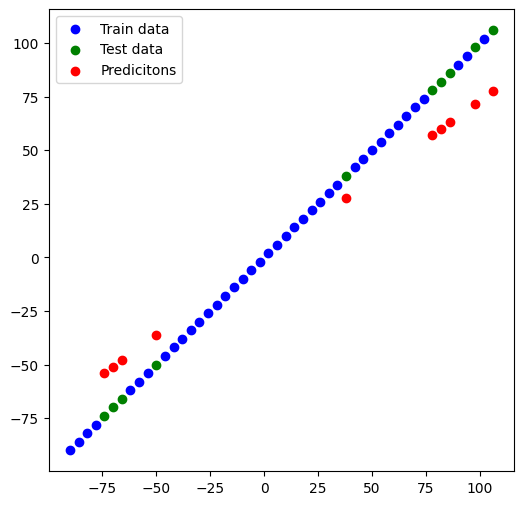

In [603]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


<p>
Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).</p>

In [604]:
# Calculate model_3 metrics
mae_3 = mae_function(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse_function(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(20.086079, 430.0284)

In [605]:
models_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]]
models_results

[['model_1', 18.477139, 364.41275],
 ['model_2', 29.793121, 947.42737],
 ['model_3', 20.086079, 430.0284]]

In [606]:
import pandas as pd

df_results = pd.DataFrame(models_results, columns=['model', 'mae', 'mse'])
df_results

,model,mae,mse
0,model_1,18.477139,364.412750
1,model_2,29.793121,947.427368
2,model_3,20.086079,430.028412


<p>From our experiments, it looks like model_2 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.</p>

**Note**: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

**Resource**: But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


## Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The **SavedModel format** (default).
2. The **HDF5 format**. 

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [607]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [608]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")  # note the addition of '.h5' on the end

## Loading a model
We can load a saved model using the `load_model()` method

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [609]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model.summary()

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 1)                 2         
                                                                 
 dense_212 (Dense)           (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Now let's test it out.

In [610]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae_function(y_test, saved_model_preds).numpy() == mae_function(y_test, model_2_preds).numpy()

1/1 [==============================] - 0s 38ms/step


True

Loading in from the HDF5 is much the same.

In [611]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 1)                 2         
                                                                 
 dense_212 (Dense)           (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [612]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae_function(y_test, h5_model_preds).numpy() == mae_function(y_test, model_2_preds).numpy()

1/1 [==============================] - 0s 35ms/step


True

#### Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below

In [613]:
## Download the model (or any file) from Google Colab
# from google.colab import files
# files.download("best_model_HDF5_format.h5")

## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available <a href='https://www.kaggle.com/datasets/mirichoi0218/insurance'>Medical Cost dataset </a>available from Kaggle and <a href='https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv'>hosted on GitHub</a>.

 **Note**: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [614]:
# Download the dataset
insurance_df = pd.read_csv(
    'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [615]:
# Check out the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###  Get more infos about our dataset


In [616]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [617]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Encode non-numerical features

We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the `get_dummies()` method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [618]:
# categorical_columns = insurance_df.select_dtypes(include=['object']) # extract object_type features (non-numerical)
# df_encoded = pd.get_dummies(insurance_df,columns=categorical_columns.columns)
df_encoded = pd.get_dummies(insurance_df,dtype=int)  # Works fine too 
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [619]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int32  
 5   sex_male          1338 non-null   int32  
 6   smoker_no         1338 non-null   int32  
 7   smoker_yes        1338 non-null   int32  
 8   region_northeast  1338 non-null   int32  
 9   region_northwest  1338 non-null   int32  
 10  region_southeast  1338 non-null   int32  
 11  region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 83.8 KB


### Split data into X and y (features and labels)

In [620]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']
print(f'X shape : {X.shape}, y shape : {y.shape}')

X shape : (1338, 11), y shape : (1338,)


In [621]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [622]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Split data to subsets train-test

In [623]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True) # No need to stratify in regression tasks

In [624]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

## Create our model

In [625]:
# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
    with tf.device('/GPU:0'):  # Use the first GPU
        # Define and compile the model here (within the device context)
        RegressionModel = tf.keras.models.Sequential([
            tf.keras.layers.Dense(1, input_shape=[11,]),
            tf.keras.layers.Dense(1)
        ])

        RegressionModel.compile(optimizer=tf.keras.optimizers.SGD(),
                                loss='mae',
                                metrics=['mae'])

        # Assuming X_train and y_train are NumPy arrays
        RegressionModel.fit(tf.constant(X_train), tf.constant(y_train),
                            epochs=100,
                            verbose=0,
                            batch_size=128,
                            callbacks=[personalized_Callback(20)])
else:
    print("GPU is not available. Training on CPU.")

GPU is available!
batch : 1 | epoch : 1 | loss: 11833.5068359375
batch : 2 | epoch : 1 | loss: 11477.162109375
batch : 3 | epoch : 1 | loss: 12727.9453125
batch : 4 | epoch : 1 | loss: 12748.154296875
batch : 5 | epoch : 1 | loss: 12688.5439453125
batch : 6 | epoch : 1 | loss: 12557.8427734375
batch : 7 | epoch : 1 | loss: 12690.291015625
batch : 8 | epoch : 1 | loss: 12700.1015625
batch : 9 | epoch : 1 | loss: 12709.1943359375
batch : 1 | epoch : 20 | loss: 8300.23828125
batch : 2 | epoch : 20 | loss: 7312.404296875
batch : 3 | epoch : 20 | loss: 7343.908203125
batch : 4 | epoch : 20 | loss: 7088.52294921875
batch : 5 | epoch : 20 | loss: 7376.20703125
batch : 6 | epoch : 20 | loss: 7170.23876953125
batch : 7 | epoch : 20 | loss: 7156.57080078125
batch : 8 | epoch : 20 | loss: 7122.88525390625
batch : 9 | epoch : 20 | loss: 7168.34326171875
batch : 1 | epoch : 40 | loss: 6485.7890625
batch : 2 | epoch : 40 | loss: 7593.7861328125
batch : 3 | epoch : 40 | loss: 7198.1640625
batch : 4 |

In [626]:
# Check the results of the insurance model
RegressionModel.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 2ms/step - loss: 8856.4561 - mae: 8856.4561


[8856.4560546875, 8856.4560546875]


Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).
Everything else will stay the same.